# Excercise 2

## Problem 1

### Part a

My first instinct here is to use the method `read_csv()` in `pandas` to read in the dataset and do further data analysis using `DataFrame`. So I import `pandas`, `re` and `numpy` and read the dataset. Also I split different lines according to different types of data by regex. 

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("q2_dataset.txt",delimiter="\t")

In [4]:
df.columns=['row']

In [5]:
authors=df[df['row'].str.contains(r'^#@(.*)')]
venues=df[df['row'].str.contains(r'^#c(.*)')]
paper=df[df['row'].str.contains(r'^#\*(.*)')]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
authors.nunique()

row    1466893
dtype: int64

In [7]:
venues.nunique()

row    255686
dtype: int64

In [8]:
paper.nunique()

row    1929487
dtype: int64

### Part b

If we directly see the unique values in each dataframe, there is indeed a number of authors, venues and publications. However, if we look into the dataset in details, we are going to find that there are some features of the dataset that might compromise the result. For example, let's try venue of *Principles and Practice of Knowledge Discovery in Databases* as in the instructions. 

In [9]:
venues[venues['row'].str.contains(r'Principles and Practice of Knowledge Discovery in Databases')]

,row
5712159,#c PKDD '04 Proceedings of the 8th European Co...
5714276,#c PKDD '04 Proceedings of the 8th European Co...
5714281,#c PKDD '04 Proceedings of the 8th European Co...
5714286,#c PKDD '04 Proceedings of the 8th European Co...
5714291,#c PKDD '04 Proceedings of the 8th European Co...
5714296,#c PKDD '04 Proceedings of the 8th European Co...
5714301,#c PKDD '04 Proceedings of the 8th European Co...
5714306,#c PKDD '04 Proceedings of the 8th European Co...
5714311,#c PKDD '04 Proceedings of the 8th European Co...
5714316,#c PKDD '04 Proceedings of the 8th European Co...


As we can see, there are several different venues that has the key words 'Principles and Practice of Knowledge Discovery in Databases' but only differ in year. 

### Part c

When we try to determine the number of distinct authors, we find that for most of the publications, the number of authors is not always one. So the number of distinct authors we get by `nunique()` is obviously not accurate. 

## Problem 2

### Part a

We continue the process started in the Problem 1. We reset the indices and strip all the symbols related to '#'. Then concat dataframes of authors, publications and venues. In this part, I have done split (split authors for the same publication) and merge (merge different publications of the same author into one line). Thus the number of publications for each author is quite straightforward. 

In [10]:
paper=paper.reset_index(drop=True)
authors=authors.reset_index(drop=True)
venues=venues.reset_index(drop=True)

In [11]:
replaced_authors=authors['row'].str.replace(r'^#@', '')
replaced_venues=venues['row'].str.replace(r'^#c', '')
replaced_paper=paper['row'].str.replace(r'^#\*', '')

In [12]:
df_new=pd.concat([replaced_paper,replaced_venues,replaced_authors],axis=1)

In [13]:
df_new.columns=['paper','venue','author']

In [14]:
df_new=df_new[df_new['author'].str.len() > 1]

In [15]:
df_new=df_new.drop('author', axis=1).join(df_new['author'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('author'))

In [16]:
author_agg = df_new.groupby('author').agg(';'.join).reset_index()

In [17]:
author_agg['paper_num']=author_agg['paper'].str.split(";").str.len()

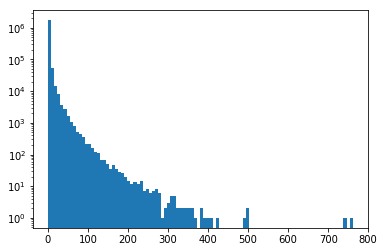

In [63]:
temp=list(author_agg['paper_num'])
plt.hist(x=temp,bins=100,log=True)
plt.show()

### Part b

When calculating those basic statistical numbers, I defined a new function named `status()` to make the result in a single dataframe.

In [19]:
def status(x):
    return pd.DataFrame([x.mean(), x.std(), x.quantile(0.25), x.median(), x.quantile(0.75)],
                    index = ['mean', 'standard deviation', '25% quantile', 'median', '75% quantile'])

In [20]:
status(author_agg['paper_num'])

,0
mean,2.695926
standard deviation,6.402360
25% quantile,1.000000
median,1.000000
75% quantile,2.000000


When comparing the median and the mean value, we may find the median is only a half of the mean value. As the standard deviation is large, it may explain the difference between median and mean value that the paper number of each author varies a lot. In addition, the 3rd quantile value is also below the mean value, which means most of the authors have a really low number of publications. However, there are also some of the authors who owns a large number of publications. And those prolific authors pull up the average number of publications per author.

### Part c

In [21]:
venue_agg = df_new.groupby('venue').agg(';'.join).reset_index()

In [22]:
venue_agg['paper_num']=venue_agg['paper'].str.split(';').str.len()

In [23]:
status(venue_agg['paper_num'])

,0
mean,19.456755
standard deviation,209.588526
25% quantile,1.000000
median,2.000000
75% quantile,3.000000


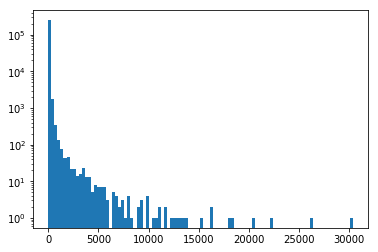

In [64]:
temp=list(venue_agg['paper_num'])
plt.hist(x=temp,bins=100,log=True)
plt.show()

In [25]:
venue_agg.sort_values(by=['paper_num'], ascending=False)

,venue,paper,author,paper_num
143203,Microelectronic Engineering,Microelectronic Engineering - Microcircuit en...,K D van der Mast;S Radelaar; A Ishitani;H Kit...,30338
39090,Bioinformatics,MedBlast: searching articles related to a bio...,Qiang Tu;Haixu Tang;Dafu Ding; Karan Vasudeva...,26097
109311,IEEE Transactions on Information Theory,The rate-distortion region for multiple descr...,Rudolf Ahlswede; Chris Heegard;Toby Berger; A...,22208
109338,IEEE Transactions on Signal Processing,Stochastic resonance in sequential detectors;...,Marco Guerriero;Stefano Marano;Vincenzo Matta...,20448
87473,Expert Systems with Applications: An Internat...,Accuracy of semi-analytic sensitivity analysi...,G.-D. Cheng;Y.-X. Gu;Y.-Y. Zhou; D. W. White;...,18473
125594,Journal of Computational Physics,Two-dimensional fully adaptive solutions of s...,M D Smooke;M L Koszykowski; J Michael Coyle;J...,17950
109289,IEEE Transactions on Consumer Electronics,A magnetic deflection up-date: field equation...,C. A. Washburn; J. Takeuchi;A. Koga;T. Kozai;...,16285
36119,Automatica (Journal of IFAC),Application of advanced control methods in th...,G A Dumont; G B Di Masi;L Finesso;G Picci; D ...,16216
109274,IEEE Transactions on Computers,A Unified Approach to a Class of Data Movemen...,Peter M. Flanders; Yang-Chang Hong; John McGo...,15411
230217,Theoretical Computer Science,A weakest precondition semantics for communic...,Tzilla Elrad;Nissim Francez; Marisa Venturini...,13687


So the venue with the largest number of publications in the dataset is *Microelectronic Engineering*. 

## Problem 3

### Part a

Since the method with `pandas` used in problem 1 and problem 2 is relatively slow, I tried to use dictionaries in problem 3 which could be much faster. First, read in the dataset. Here I use different key and value pairs to store different types of data and using those dictionaries like relational databases. For example, in `dic`, I assign publication index to key and a list of references to value. Similarly, the function of all other dictionaries are commented in the code cells. 

In [26]:
import operator
%matplotlib inline

In [27]:
dic = {} #references for each publication
venue_dic = {} #venue name for each publication
publication_dic = {} #publication name and index connection
year_dic = {} #the year of a publication
temp = []
index_temp = ''
with open ("q2_dataset.txt", 'r') as f:
    for line in f.readlines():
        if re.search('^#index(.*)', line):
            line = line.strip('#index ').strip('\n')
            dic[str(int(line)-1)]=temp
            index_temp = line
            temp = []
        elif re.search('^#%(.*)', line):
            line = line.strip('#% ').strip('\n')
            temp.append(line)
        elif re.search('^#c(.*)', line):
            line = line.strip('#c ').strip('\n')
            venue_dic[index_temp] = line
        elif re.search('^#\*(.*)', line):
            line = line.strip('#* ').strip('\n')
            publication_dic[index_temp] = line
        elif re.search('^#t(.*)', line):
            line = line.strip('#t ').strip('\n')
            year_dic[index_temp] = line
dic.pop('0', 0)

[]

Here I use `dic` and `citations` to indicate list of references and number of citations for each publication. And `dic_count` as the number of references of each publication. Then plot a histogram of the number of references and citations per paper. 

In [28]:
citations = {} #citations times for each publication
for pair in dic:
    for cit in dic[pair]:
        if cit in citations.keys():
            citations[cit]+=1
        else:
            citations[cit]=1

In [29]:
dic_count = {} #count the number of references of each publication
for pair in dic:
    dic_count[pair] = len(dic[pair])

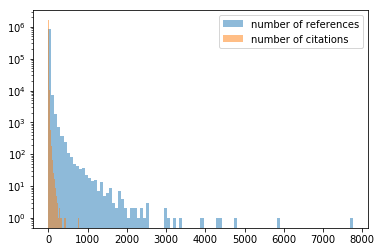

In [30]:
fig, ax = plt.subplots()
ax.hist(list(citations.values()), bins=100, log=True, alpha=1/2, label='number of references')
ax.hist(list(dic_count.values()), bins=100, log=True, alpha=1/2, label='number of citations')
ax.legend()

In [31]:
dic_sort = sorted(dic_count.items(),key = operator.itemgetter(1),reverse = True)

In [32]:
dic_sort[:5]

[('719353', 772),
 ('1221204', 555),
 ('1583653', 527),
 ('1376720', 524),
 ('1221200', 523)]

In [33]:
publication_dic[dic_sort[0][0]]

'Cited References'

In [34]:
citations_sort = sorted(citations.items(),key = operator.itemgetter(1),reverse = True)

In [35]:
citations_sort[:5]

[('408396', 7753),
 ('369236', 5891),
 ('190581', 4748),
 ('136350', 4399),
 ('168251', 4336)]

In [36]:
publication_dic[citations_sort[0][0]]

'Computers and Intractability: A Guide to the Theory of NP-Completeness'

From the sorting results above, we finally find that *Cited References* has the largest number of references and *Computers and Intractability: A Guide to the Theory of NP-Completeness* has the largest number of citations. 

### Part b & c

We first calculate the number of publications in each venue and then derive the total number of citations for the publications in each venue along with number of citations that we get in part a. Then we simply divide those two numbers and get the impact factor for each venue. 

In [37]:
pub_per_venue={} #the number of publications for each venue
for pair in venue_dic:
    key = venue_dic[pair]
    if key in pub_per_venue.keys():
        pub_per_venue[key]+=1
    else:
        pub_per_venue[key]=1

In [38]:
cit_per_venue={} #total number of citations for the publications in the venue
for pair in citations:
    num = citations[pair]
    if pair in venue_dic.keys():
        key = venue_dic[pair]
    if key in cit_per_venue.keys():
        cit_per_venue[key]+=num
    else:
        cit_per_venue[key]=num

In [39]:
impact_factor={}
for pair in cit_per_venue:
    impact_factor[pair]=cit_per_venue[pair]/pub_per_venue[pair]

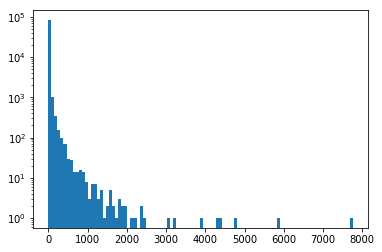

In [40]:
plt.hist(list(impact_factor.values()), bins=100, log=True)
plt.show()

In [41]:
factor_sort = sorted(impact_factor.items(),key = operator.itemgetter(1),reverse = True)

In [42]:
factor_sort[:5]

[('Computers and Intractability: A Guide to the Theory of NP-Completeness',
  7753.0),
 ('Genetic Algorithms in Search, Optimization and Machine Learning', 5891.0),
 ('The nature of statistical learning theory', 4748.0),
 ('C4.5: programs for machine learning', 4399.0),
 ('Design patterns: elements of reusable object-oriented software', 4336.0)]

In [43]:
pub_per_venue['Computers and Intractability: A Guide to the Theory of NP-Completeness']

1

By sorting the dictionary of `impact_factor`, we can see that the venue with the highest impact factor is named *Computers and Intractability: A Guide to the Theory of NP-Completeness*. However, the number here (7753) is quite unconvincing. If we dig deeper, we will find that there is only one publications within this venue which accounts for the uncommonly big impact factor here. Hence, the result is not acceptable, and we are going to find another way.

### Part d

As mentioned, the impact factor calculated in part c is not convincing. So we are going to restrict the calculation to venues with at least 10 publications. When we apply that, the number is acceptable. 

In [44]:
venue_least10={} #venues with at least ten publications in it
for pair in pub_per_venue:
    temp = pub_per_venue[pair]
    if temp > 10:
        venue_least10[pair] = temp

In [45]:
impact_factor_least10={}
for pair in cit_per_venue:
    if pair in venue_least10.keys():
        impact_factor_least10[pair]=cit_per_venue[pair]/venue_least10[pair]

In [46]:
factor_sort_least10 = sorted(impact_factor_least10.items(),key = operator.itemgetter(1),reverse = True)

In [47]:
factor_sort_least10[:5]

[('Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications',
  214.82608695652175),
 ('Computational Linguistics - Special issue on using large corpora: II',
  195.5),
 ("SOSP '01 Proceedings of the eighteenth ACM symposium on Operating systems principles",
  177.7058823529412),
 ("MobiCom '00 Proceedings of the 6th annual international conference on Mobile computing and networking",
  176.21428571428572),
 ("SOSP '03 Proceedings of the nineteenth ACM symposium on Operating systems principles",
  164.54545454545453)]

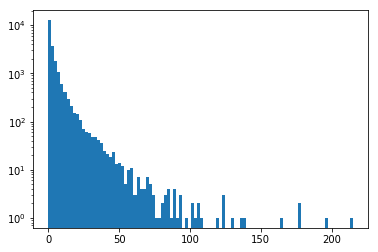

In [48]:
plt.hist(list(impact_factor_least10.values()), bins=100, log=True)
plt.show()

As the process and results shown above, the histogram seems more smooth with a crest not as much sharp and the venue with the highest impact factor is named *Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications* with a impact factor of around 215. And I print all publication names in it as `pub_in_hfv`.

In [49]:
highest_factor_venue={}
for pair in venue_dic:
    if venue_dic[pair]=='Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications':
        highest_factor_venue[pair]=venue_dic[pair]

In [50]:
pub_in_hfv={}
for pair in highest_factor_venue:
    pub_in_hfv[publication_dic[pair]]=citations[pair]
pub_in_hfv_sort = sorted(pub_in_hfv.items(),key = operator.itemgetter(1),reverse = True)

In [65]:
pub_in_hfv

{'Hash-based IP traceback': 167,
 'On the effectiveness of route-based packet filtering for distributed DoS attack prevention in power-law internets': 115,
 'Reliable group rekeying: a performance analysis': 48,
 'Aging through cascaded caches: performance issues in the distribution of web content': 11,
 'Enabling conferencing applications on the internet using an overlay muilticast architecture': 138,
 'IPNL: A NAT-extended internet architecture': 50,
 'On the impact of policing and rate guarantees in DiffServ networks: a video streaming application perspective': 10,
 'Scalable on-demand media streaming with packet loss recovery': 11,
 'Statistical bandwidth sharing: a study of congestion at flow level': 112,
 'Analysis and design of an adaptive virtual queue (AVQ) algorithm for active queue management': 103,
 'Algorithms for provisioning virtual private networks in the hose model': 27,
 'Chord: A scalable peer-to-peer lookup service for internet applications': 2140,
 'A scalable cont

When we considered mean number of ciations (which is also impact factor) and median number of citations, we come back to the dictionary of `citations`.

In [51]:
mean_value = factor_sort_least10[0][1]
mean_value

214.82608695652175

In [52]:
median_value = pub_in_hfv_sort[int(len(pub_in_hfv_sort)/2)]
median_value

('Extending equation-based congestion control to multicast applications', 46)

The median value is relatively small comparing to the mean value. The reason here might be that some of the well-done papers have a really high citation numbers and drag the entire mean value to a high level. While vast number of papers are having a low level citation number.

### Part e

As in Part a, we have already constructed a dictionary that saves the publication year of each paper named `year_dic`. First, count the number of publications in each year and save as `year_count`. Then we connect this with `dic` to find the relationship between references and time. 

In [53]:
year_count={}#number of publications in each year
for pair in year_dic:
    key = year_dic[pair]
    if key in year_count.keys():
        year_count[key]+=1
    else:
        year_count[key]=1

In [54]:
year_count.pop('',0)

138

In [55]:
year_ref = {}#number of references in each year
for pair in year_dic:
    year = year_dic[pair]
    if pair in dic_count.keys() :
        if year in year_ref.keys():
            year_ref[year] += dic_count[pair]
        else:
            year_ref[year] = dic_count[pair]

In [56]:
year_ref_avg={}#average number of references in each year
for pair in year_count:
    if pair in year_ref.keys():
        year_ref_avg[pair] = year_ref[pair]/year_count[pair]

When we consider citations, we have to find the number of citations in each year. 

In [57]:
year_cit = {}#number of citations in each year
for pair in year_dic:
    key = year_dic[pair]
    if pair in citations.keys():
        if key in year_cit.keys():
            year_cit[key] += citations[pair]
        else:
            year_cit[key] = citations[pair]
year_cit.pop('', 0)

382

In [58]:
year_cit_avg = {}#average number of citations in each year
for pair in year_cit:
    key = year_cit[pair]
    year_cit_avg[pair] = year_cit[pair]/year_count[pair]

In [59]:
int_year_ref = {}#convert keys to int
for k, v in year_ref_avg.items():
    if len(k) == 4:
        int_year_ref[int(k)] = v
    else:
        int_year_ref[0] = v
int_year_cit = {}#convert keys to int
for k, v in year_cit_avg.items():
    if len(k) == 4:
        int_year_cit[int(k)] = v
    else:
        int_year_cit[0] = v

In [60]:
int_year_ref.pop(0, 0)
int_year_cit.pop(0, 0)

0

In [61]:
x1, y1=zip(*list(sorted(int_year_ref.items())))
x2, y2=zip(*list(sorted(int_year_cit.items())))

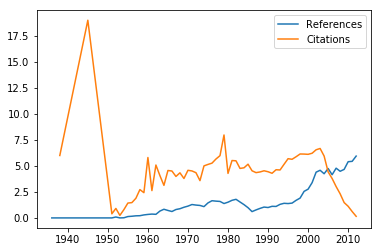

In [62]:
fig, ax = plt.subplots()
ax.plot(x1, y1, label='References')
ax.plot(x2, y2, label='Citations')
ax.legend()

From the plot, it's obvious that the number of references basically increases along the time. On the other hand, the number of citations doesn't fit for a monotonic trend. 

I would like to explain it that as the science and technology research boosting, the number of publications also increases quickly. So, for authors in 21th century, they have much more different existing publications for them to refer than authors in like '60s. 

While the curve for citations is another story, the peak around 1945 seems really weird in the first place. But it appears that there is not as many publications comparing to more recent years. So one publication with a high citation number would definitly increase the average citation number in that year. And that paper may be some breaking discovery. When time comes to the 21th century, there is a hugh drop for the average number of citations. The reason here is that new publications needs some time to make a difference. For example, when a new paper get published, other researchers need a few years to figure out what they can do based on the results made by this new paper. 